## Corrections in code

* hist.normed has been deprecated, use density keyword instead
* Originally bilby.gw.prior.UniformComovingVolume line showed an error because it does not accept name = 'name'. Says name not recognized.
* 'FromFile' object has no attribute 'inverse_cumulative_distribution' error 

In [5]:
from __future__ import division, print_function
import numpy as np
import bilby

%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


17:20 bilby WARNING : Can't load comoving.txt.
17:20 bilby WARNING : Format should be:
17:20 bilby WARNING : x\tp(x)


AttributeError: 'FromFile' object has no attribute 'inverse_cumulative_distribution'

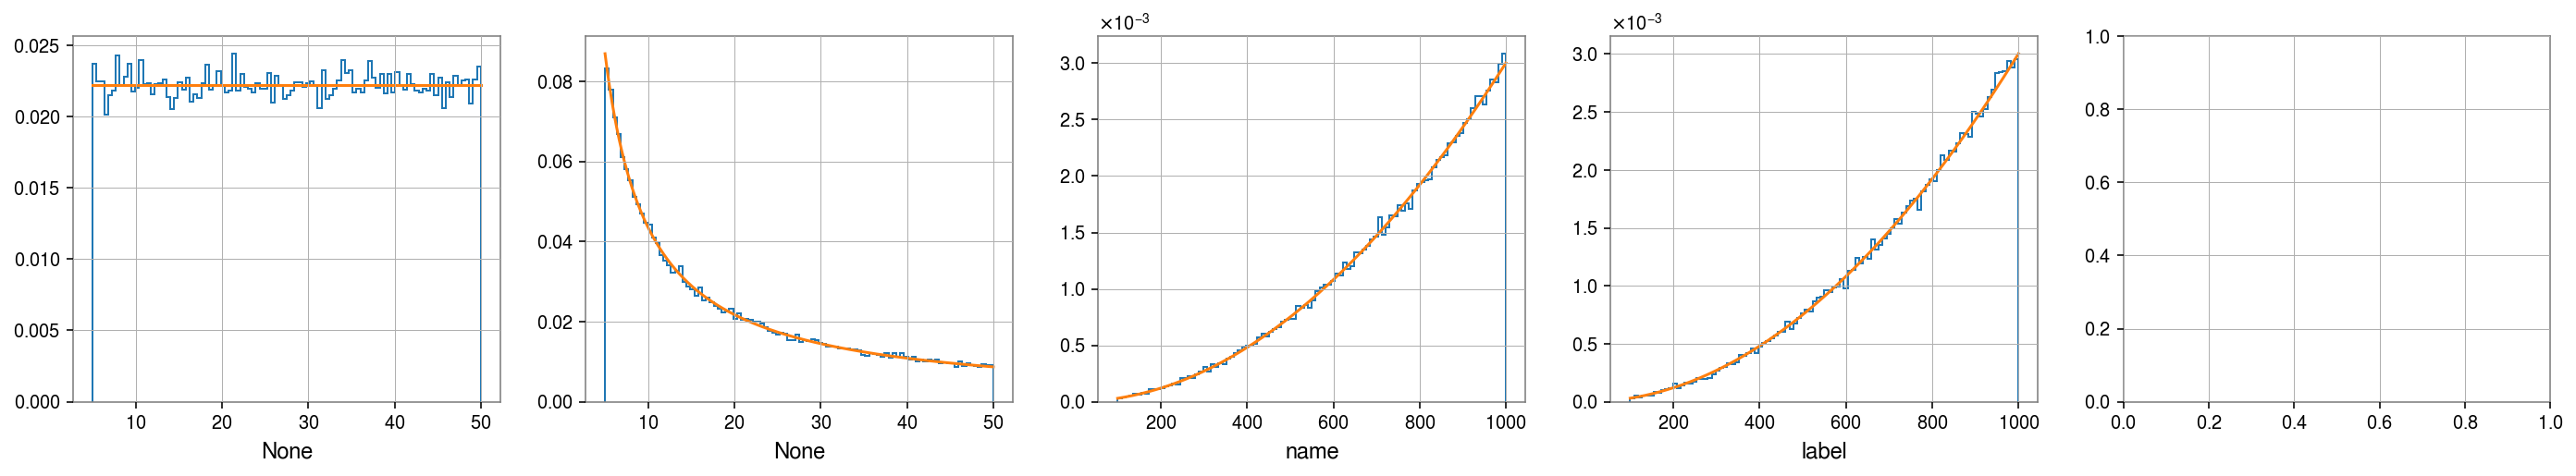

In [8]:
fig = figure(figsize=(24, 8))

priors = [
    bilby.core.prior.Uniform(minimum=5, maximum=50),
    bilby.core.prior.LogUniform(minimum=5, maximum=50),
    bilby.core.prior.PowerLaw(name='name', alpha=2, minimum=100, maximum=1000),
    bilby.gw.prior.UniformComovingVolume(name='comoving_distance', minimum=100, maximum=1000, latex_label='label'),
    bilby.core.prior.FromFile(name='comoving_distance', file_name='comoving.txt', minimum=100, maximum=30000, latex_label='label'),
    bilby.core.prior.Gaussian(name='name', mu=0, sigma=1, latex_label='label'),
    bilby.core.prior.TruncatedGaussian(name='name', mu=1, sigma=0.4, minimum=-1, maximum=1,
                                  latex_label='label'),
    bilby.core.prior.Cosine(name='name', latex_label='label'),
    bilby.core.prior.Sine(name='name', latex_label='label'),
    bilby.core.prior.Interped(name='name', xx = np.linspace(0, 10, 1000), yy=np.linspace(0, 10, 1000)**4,
                         minimum=3, maximum=5, latex_label='label')
]

for ii, prior in enumerate(priors):
    fig.add_subplot(2, 5, 1 + ii)
    hist(prior.sample(100000), bins=100, histtype='step', density = 1)
    if not isinstance(prior, bilby.core.prior.Gaussian):
        plot(np.linspace(prior.minimum, prior.maximum, 1000),
             prior.prob(np.linspace(prior.minimum, prior.maximum, 1000)))
    else:
        plot(np.linspace(-5, 5, 1000), prior.prob(np.linspace(-5, 5, 1000)))
    xlabel('{}'.format(prior.latex_label))
    
tight_layout()
show()
close()

## Making new priors

In [1]:
plt.figure(figsize = (8,8))

prior = bilby.core.prior.Uniform(minimum = 0, maximum = 1)
hist(prior.sample(100), bins = 100, histtype = 'step', density = 1)

if not isinstance(prior, bilby.core.prior.Gaussian):
    plot(np.linspace(prior.minimum, prior.maximum, 100), prior.prob(np.linspace(prior.minimum, prior.maximum, 100)))
else:
    plot(np.linspace(0, 1, 100), prior.prob(np.linspace(0, 1, 100)))
xlabel('{}'.format(prior.latex_label))

show()
close()

NameError: name 'plt' is not defined